## Binarization
*This Note book I decided to explore the difference between the following techniques* **Three popular binarization techniques**:
1. Binarizer (Scikit-learn)
    - What it does: Converts NUMERIC values to binary (0 or 1) based on a threshold
    - NOT for categorical encoding!
    - Used for different purpose entirely
2. get_dummies() (Pandas)
    - What it does: Converts categorical columns to binary columns
    - Returns: A DataFrame (easy to work with)
    - Simple and quick for basic exploratory work
3. OneHotEncoder (Scikit-learn)
    - What it does: Converts categorical columns to binary columns
    - Returns: A sparse matrix or array
    - More powerful for production ML pipelines


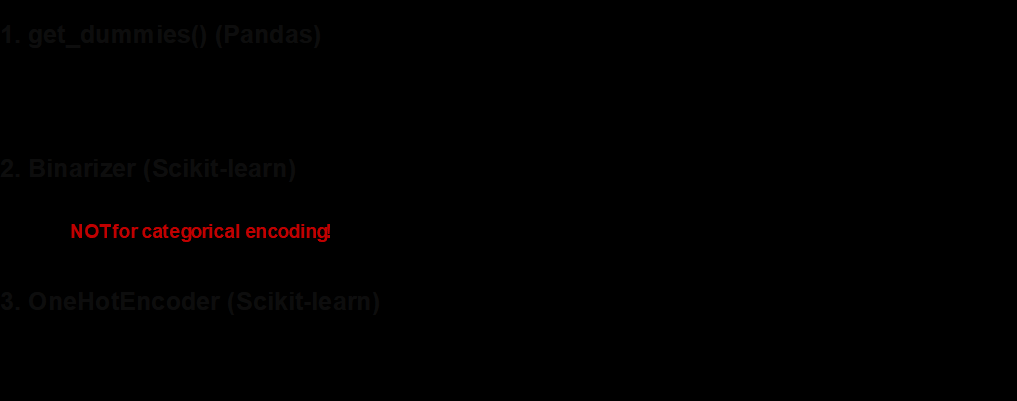

In [9]:
# 1. Binarizer Example
import numpy as np
from sklearn.preprocessing import Binarizer
"""
IMPORTANT NOTE:
If value > threshold → output is 1
If value ≤ threshold → output is 0
"""
# A sample example that convert ages to binary based on a threshold of 18
ages = np.array([[15], [22], [18], [30], [12]])
binarizer = Binarizer(threshold=18)
result = binarizer.fit_transform(ages)
print("Binarizer Output (Ages >= 18):")
# Here you can use `.flatten()` to convert to 1D array for easier viewing
# or `.T` to transpose to 2D array
# or `.reshape(1,-1)` to reshape to 2D array
# or `.ravel()` to flatten to 1D array
print(result.flatten())

Binarizer Output (Ages >= 18):
[0 1 0 1 0]


In [42]:
# 2. get_dummies() Example
import pandas as pd
# Train a sample DataFrame with categorical data
train = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']})
# Use get_dummies to convert categorical column to binary columns
# Add dtype=int to get 0/1 instead of True/False
train_encoded = pd.get_dummies(train, dtype=int)
print("Training Data Encoded:")
print(train_encoded)

# Test data (has new category 'Yellow')
test = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red', 'Yellow']})
test_encoded = pd.get_dummies(test, dtype=int)

print("\nTest Data Before Alignment:")
print("Train columns:", train_encoded.columns.tolist())
print("Test columns:", test_encoded.columns.tolist())
print("Columns don't match! Test has 4 columns, train has 3 columns")
print("Test has extra 'Color_Yellow' column that training doesn't have")
print(test_encoded)

# Align test data to match training data columns:
# - Removes extra columns that train doesn't have (e.g., 'Color_Yellow')
# - Adds missing columns that train has but test doesn't (filled with 0s)
# - Result: Both datasets have identical columns in the same order
# This is very important because ML models require train and test data to have identical features!
test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

print("\nTest Data After Alignment:")
print("Train columns:", train_encoded.columns.tolist())
print("Test columns:", test_encoded.columns.tolist())
print("Columns now match! Both have 3 columns")
print("'Color_Yellow' column was removed during alignment")
print("Row 5 (Yellow) now has all 0s because it's an unknown category")
print(test_encoded)

Training Data Encoded:
   Color_Blue  Color_Green  Color_Red
0           0            0          1
1           1            0          0
2           0            1          0
3           1            0          0
4           0            0          1

Test Data Before Alignment:
Train columns: ['Color_Blue', 'Color_Green', 'Color_Red']
Test columns: ['Color_Blue', 'Color_Green', 'Color_Red', 'Color_Yellow']
Columns don't match! Test has 4 columns, train has 3 columns
Test has extra 'Color_Yellow' column that training doesn't have
   Color_Blue  Color_Green  Color_Red  Color_Yellow
0           0            0          1             0
1           1            0          0             0
2           0            1          0             0
3           1            0          0             0
4           0            0          1             0
5           0            0          0             1

Test Data After Alignment:
Train columns: ['Color_Blue', 'Color_Green', 'Color_Red']
Test columns: 

In [63]:
# 3. OneHotEncoder Example
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Training data
train = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']})
encoder.fit_transform(train[['Color']])

# convert to DataFrame for easier viewing
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(['Color']))

# Test data (has new category 'Yellow')
test = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red', 'Yellow']})
test_encoded = encoder.transform(test[['Color']])
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(['Color']))
print("Training Data Encoded:")
print(train_encoded_df)
print("\nFeature names during training:", encoder.get_feature_names_out(['Color']).tolist())
print("Feature names during testing:", encoder.get_feature_names_out(['Color']).tolist())
print("\nTest Data Encoded:")
print(test_encoded_df)

Training Data Encoded:
   Color_Blue  Color_Green  Color_Red
0         0.0          0.0        1.0
1         0.0          1.0        0.0
2         1.0          0.0        0.0

Feature names during training: ['Color_Blue', 'Color_Green', 'Color_Red']
Feature names during testing: ['Color_Blue', 'Color_Green', 'Color_Red']

Test Data Encoded:
   Color_Blue  Color_Green  Color_Red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         1.0          0.0        0.0
4         0.0          0.0        1.0
5         0.0          0.0        0.0


* Note how `Color_Yellow` column is missing in test data encoding
* because we set `handle_unknown='ignore'` during encoder initialization
* This prevents errors during transformation when unknown categories are encountered
* Row 5 (Yellow) has all 0s because it's an unknown category
* This is similar to how we aligned columns in `get_dummies()` example
* Both techniques ensure train and test data have consistent features for ML models